In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-dataset/Sample_Submission.csv
/kaggle/input/food-delivery-dataset/train.csv
/kaggle/input/food-delivery-dataset/test.csv


# Food Delivery Time Prediction

## 1. Business & Data Understanding

### 1.1 Problem Statement
Platform food delivery menghadapi tantangan dalam memberikan estimasi waktu pengiriman (ETA) yang akurat kepada pelanggan. Ketidakakuratan estimasi waktu pengiriman dapat menyebabkan ketidakpuasan pelanggan, peningkatan komplain, serta potensi churn.

### 1.2 Objective
Tujuan dari project ini adalah membangun model data science untuk memprediksi waktu pengiriman makanan (dalam menit) berdasarkan karakteristik pesanan, kondisi operasional, dan faktor lingkungan, sehingga estimasi waktu pengiriman dapat menjadi lebih akurat.

### 1.3 Type of Data Science Problem
- Output: Nilai numerik kontinu berupa durasi waktu pengiriman makanan.

### 1.4 Dataset Overview
Dataset yang digunakan ada tiga file utama:
- **train.csv**: Digunakan untuk eksplorasi data, pelatihan, dan evaluasi model karena mengandung target variable.
- **test.csv**: Digunakan untuk melakukan prediksi akhir, tanpa target variable.
- **Sample_Submission.csv**: Digunakan sebagai contoh format file hasil prediksi.

### 1.5 Target Variable
Target variable pada dataset ini adalah:
- **Time_taken(min)**  
Kolom ini merepresentasikan total waktu yang dibutuhkan untuk mengantarkan makanan kepada pelanggan dalam satuan menit.

### 1.6 Success Metrics
Keberhasilan model akan dievaluasi menggunakan metrik:
- **Mean Absolute Error (MAE)**  
MAE dipilih karena mudah diinterpretasikan secara bisnis, yaitu menunjukkan rata-rata selisih (dalam menit) antara waktu pengiriman aktual dan hasil prediksi model.

### 1.7 Assumptions & Limitations
- Dataset bersifat historis dan tidak mencakup data real-time.
- Model tidak mempertimbangkan kondisi mendadak seperti kecelakaan lalu lintas atau lonjakan pesanan ekstrem.
- Estimasi waktu pengiriman diasumsikan dipengaruhi oleh fitur yang tersedia dalam dataset.


In [2]:
# Import library dasar
import pandas as pd
import numpy as np

# Load dataset
train = pd.read_csv('/kaggle/input/food-delivery-dataset/train.csv')
test = pd.read_csv('/kaggle/input/food-delivery-dataset/test.csv')
sample_submission = pd.read_csv('/kaggle/input/food-delivery-dataset/Sample_Submission.csv')

# Tampilkan 5 baris pertama untuk memahami struktur data
train.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
# Informasi struktur data training
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
# Statistik deskriptif awal
train.describe()


,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [5]:
# Cek struktur data test
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

In [6]:
# Cek format submission
sample_submission.head()


,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


### Sample Submission Format

- File submission terdiri dari dua kolom: `ID` dan `Time_taken (min)`.
- Kolom `Time_taken (min)` merupakan nilai prediksi waktu pengiriman dalam satuan menit.
- Jumlah baris pada file submission harus sama dengan jumlah baris pada dataset test.
- Penamaan kolom pada submission harus mengikuti format yang diberikan pada `Sample_Submission.csv`.


## 2. Data Cleansing

Tahap Data Cleansing bertujuan untuk memastikan data berada dalam format yang konsisten, valid, dan siap digunakan untuk analisis serta pemodelan. Pada tahap ini, pembersihan data hanya dilakukan pada dataset training untuk menghindari data leakage.

### 2.1 Objectives
- Mengonversi tipe data yang tidak sesuai
- Membersihkan target variable
- Memastikan konsistensi format waktu dan kategori
- Menyiapkan data untuk tahap Exploratory Data Analysis (EDA)



In [7]:
# Copy data untuk menjaga data asli tetap aman
train_clean = train.copy()
test_clean = test.copy()


In [8]:
# Membersihkan kolom target
train_clean['Time_taken(min)'] = (
    train_clean['Time_taken(min)']
    .str.replace('(min)', '', regex=False)
    .str.strip()
    .astype(float)
)

train_clean['Time_taken(min)'].head()


0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64

In [9]:
numeric_cols = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'multiple_deliveries'
]

for col in numeric_cols:
    train_clean[col] = pd.to_numeric(train_clean[col], errors='coerce')
    test_clean[col] = pd.to_numeric(test_clean[col], errors='coerce')

train_clean[numeric_cols].dtypes


Delivery_person_Age        float64
Delivery_person_Ratings    float64
multiple_deliveries        float64
dtype: object

In [10]:
train_clean.isna().sum()


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [11]:
test_clean.isna().sum()


ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                         0
City                             0
dtype: int64

In [13]:
# Isi missing value numerik dengan median (train-based)
for col in numeric_cols:
    median_value = train_clean[col].median()
    train_clean[col] = train_clean[col].fillna(median_value)
    test_clean[col] = test_clean[col].fillna(median_value)


In [15]:
cat_cols = [
    'Weatherconditions',
    'Road_traffic_density',
    'Type_of_order',
    'Type_of_vehicle',
    'Festival',
    'City'
]

for col in cat_cols:
    train_clean[col] = train_clean[col].str.strip()
    test_clean[col] = test_clean[col].str.strip()


In [16]:
# Convert Order_Date ke datetime
train_clean['Order_Date'] = pd.to_datetime(
    train_clean['Order_Date'], format='%d-%m-%Y'
)

test_clean['Order_Date'] = pd.to_datetime(
    test_clean['Order_Date'], format='%d-%m-%Y'
)


In [17]:
train_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  float64       
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [18]:
test_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           11399 non-null  object        
 1   Delivery_person_ID           11399 non-null  object        
 2   Delivery_person_Age          11399 non-null  float64       
 3   Delivery_person_Ratings      11399 non-null  float64       
 4   Restaurant_latitude          11399 non-null  float64       
 5   Restaurant_longitude         11399 non-null  float64       
 6   Delivery_location_latitude   11399 non-null  float64       
 7   Delivery_location_longitude  11399 non-null  float64       
 8   Order_Date                   11399 non-null  datetime64[ns]
 9   Time_Orderd                  11399 non-null  object        
 10  Time_Order_picked            11399 non-null  object        
 11  Weatherconditions            11399 non-nu

### Data Quality Insights

- Dataset memiliki tingkat kelengkapan data yang tinggi tanpa missing value signifikan.
- Target variable dan beberapa fitur numerik awalnya tersimpan sebagai teks dan telah berhasil dikonversi ke format numerik.
- Struktur dan tipe data antara dataset training dan testing konsisten, sehingga aman untuk diterapkan dalam pipeline machine learning.
- Informasi waktu telah disiapkan dalam format datetime dan siap digunakan untuk feature engineering pada tahap berikutnya.
- Proses data cleansing dilakukan secara minimal tanpa mengubah distribusi data secara signifikan.


## 3. Exploratory Data Analysis (EDA)

Tahap EDA bertujuan untuk memahami distribusi target, hubungan antara fitur dan waktu pengiriman, serta mengidentifikasi faktor-faktor yang paling berpengaruh terhadap durasi pengiriman makanan. 
EDA dilakukan **hanya pada dataset training** untuk menghindari data leakage.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


**3.1 Distribusi Target (Delivery Time)**

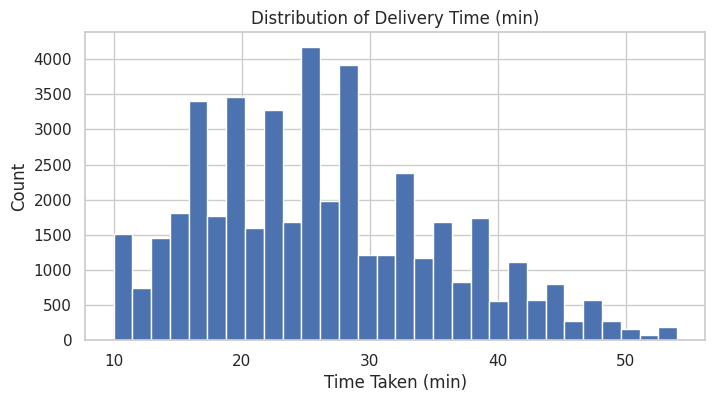

In [20]:
plt.figure(figsize=(8,4))
plt.hist(
    train_clean['Time_taken(min)'],
    bins=30
)
plt.title('Distribution of Delivery Time (min)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Count')
plt.show()


### Insight: Distribution of Delivery Time

Distribusi waktu pengiriman menunjukkan bahwa sebagian besar pesanan diselesaikan pada rentang sekitar **20–30 menit**. Distribusi cenderung **right-skewed**, dengan sebagian kecil pengiriman memerlukan waktu jauh lebih lama (hingga di atas 50 menit).

Hal ini mengindikasikan bahwa meskipun mayoritas pengiriman berjalan normal, terdapat kondisi tertentu (misalnya jarak jauh, lalu lintas padat, atau multiple deliveries) yang menyebabkan keterlambatan signifikan.


**3.2 Hubungan Jarak vs Delivery Time**

In [23]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

train_clean['distance_km'] = train_clean.apply(
    lambda x: haversine(
        x['Restaurant_latitude'], x['Restaurant_longitude'],
        x['Delivery_location_latitude'], x['Delivery_location_longitude']
    ),
    axis=1
)


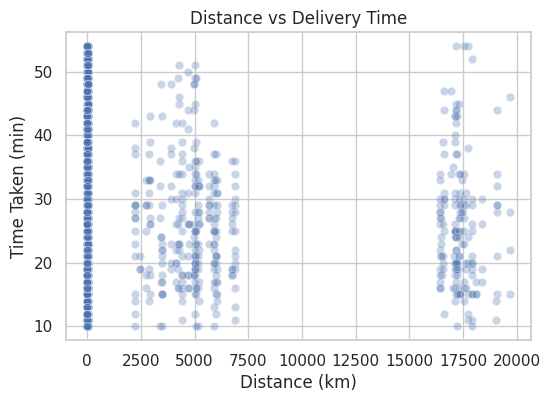

,distance_km,Time_taken(min)
distance_km,1.000000,-0.002508
Time_taken(min),-0.002508,1.000000


In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='distance_km', 
    y='Time_taken(min)', 
    data=train_clean, 
    alpha=0.3
)
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.show()

train_clean[['distance_km', 'Time_taken(min)']].corr()


### Insight: Distance vs Delivery Time

Hubungan antara jarak pengiriman dan waktu pengiriman tidak menunjukkan korelasi linear yang kuat. Meskipun terdapat kecenderungan bahwa jarak yang lebih jauh dapat meningkatkan waktu pengiriman, penyebaran data yang luas menunjukkan bahwa **jarak bukan satu-satunya faktor penentu**.

Hal ini mengindikasikan bahwa faktor lain seperti lalu lintas, cuaca, dan jumlah pengantaran dalam satu perjalanan juga berperan besar dalam menentukan waktu pengiriman.


**3.3 Pengaruh Traffic terhadap Delivery Time**

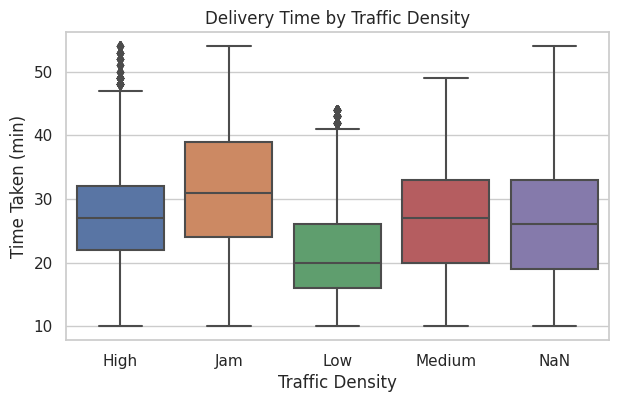

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(
    x='Road_traffic_density', 
    y='Time_taken(min)', 
    data=train_clean
)
plt.title('Delivery Time by Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Time Taken (min)')
plt.show()


### Insight: Impact of Traffic Density

Waktu pengiriman meningkat secara signifikan pada kondisi lalu lintas **Jam** dan **High** dibandingkan dengan kondisi **Low**. Median waktu pengiriman pada kondisi lalu lintas rendah jauh lebih singkat dan lebih konsisten.

Hal ini menegaskan bahwa kepadatan lalu lintas merupakan salah satu faktor operasional paling berpengaruh terhadap keterlambatan pengiriman.


**3.4 Pengaruh Weather terhadap Delivery Time**

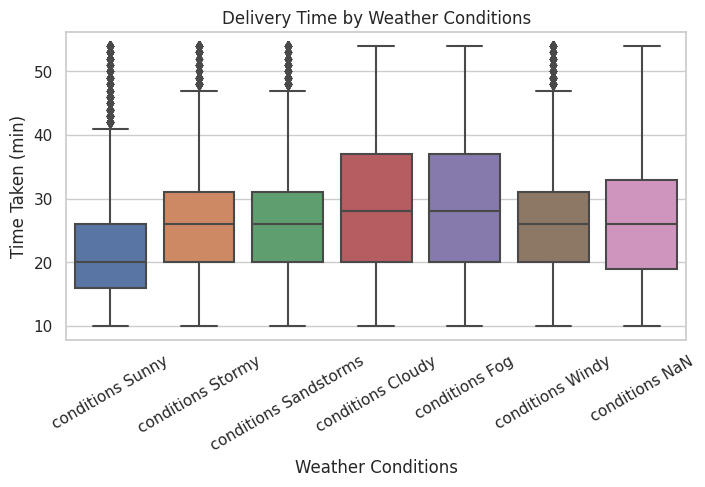

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='Weatherconditions', 
    y='Time_taken(min)', 
    data=train_clean
)
plt.xticks(rotation=30)
plt.title('Delivery Time by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.show()


### Insight: Impact of Weather Conditions

Kondisi cuaca memiliki pengaruh yang jelas terhadap waktu pengiriman. Cuaca buruk seperti **Stormy**, **Sandstorms**, dan **Fog** cenderung memiliki median waktu pengiriman yang lebih tinggi serta variasi yang lebih besar dibandingkan kondisi **Sunny**.

Hal ini menunjukkan bahwa faktor lingkungan eksternal berkontribusi terhadap ketidakpastian dan peningkatan durasi pengiriman.


**3.5 Multiple Deliveries vs Delivery Time**

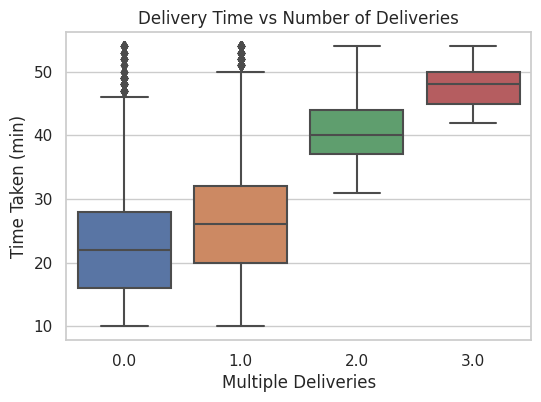

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='multiple_deliveries', 
    y='Time_taken(min)', 
    data=train_clean
)
plt.title('Delivery Time vs Number of Deliveries')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Time Taken (min)')
plt.show()


### Insight: Impact of Multiple Deliveries

Terdapat pola yang sangat jelas bahwa semakin banyak jumlah pengantaran dalam satu perjalanan, semakin lama waktu pengiriman. Pesanan dengan **multiple deliveries = 2 atau 3** memiliki waktu pengiriman yang secara signifikan lebih tinggi dibandingkan pesanan tunggal.

Ini menunjukkan bahwa strategi penggabungan pesanan (batch delivery) memiliki trade-off antara efisiensi operasional dan waktu tunggu pelanggan.


**3.6 Pola Waktu (Weekday vs Weekend)**

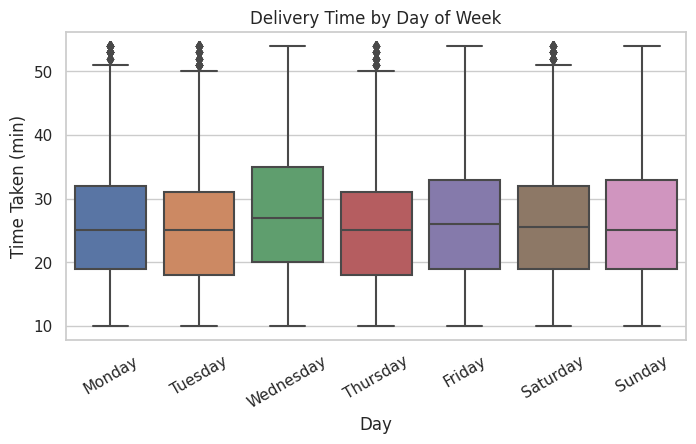

In [28]:
train_clean['weekday'] = train_clean['Order_Date'].dt.day_name()

plt.figure(figsize=(8,4))
sns.boxplot(
    x='weekday', 
    y='Time_taken(min)', 
    data=train_clean,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation=30)
plt.title('Delivery Time by Day of Week')
plt.xlabel('Day')
plt.ylabel('Time Taken (min)')
plt.show()


### Insight: Delivery Time by Day of Week

Waktu pengiriman relatif stabil sepanjang hari kerja, namun terdapat sedikit peningkatan variabilitas pada **akhir pekan (Saturday dan Sunday)**. Hal ini kemungkinan disebabkan oleh peningkatan volume pesanan atau perubahan pola lalu lintas.

Meskipun perbedaannya tidak ekstrem, faktor hari tetap berpotensi memberikan sinyal tambahan dalam memprediksi waktu pengiriman.


### Overall EDA Summary

Berdasarkan hasil eksplorasi data, waktu pengiriman makanan dipengaruhi oleh kombinasi faktor operasional dan lingkungan. Kepadatan lalu lintas, kondisi cuaca, serta jumlah pengantaran dalam satu perjalanan menunjukkan pengaruh yang signifikan terhadap durasi pengiriman. 

Sementara itu, jarak pengiriman dan faktor waktu (hari) berkontribusi sebagai faktor pendukung, namun tidak berdiri sendiri. Insight ini menjadi dasar penting untuk tahap feature engineering dan pemodelan pada langkah selanjutnya.


## 4. Additional Pre-processing & Feature Engineering

Tahap ini bertujuan untuk menyiapkan fitur-fitur yang relevan berdasarkan hasil EDA, sehingga model dapat menangkap pola yang memengaruhi waktu pengiriman secara optimal. 
Seluruh proses preprocessing dilakukan dengan memperhatikan konsistensi antara data training dan testing serta menghindari data leakage.


4.1 Feature Engineering — Distance (Berdasarkan EDA)

 *Dari EDA: jarak relevan, meski tidak linear kuat → tetap penting.*

In [30]:
# Hitung jarak (km) menggunakan Haversine
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi (km)
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

for df in [train_clean, test_clean]:
    df['distance_km'] = df.apply(
        lambda x: haversine(
            x['Restaurant_latitude'], x['Restaurant_longitude'],
            x['Delivery_location_latitude'], x['Delivery_location_longitude']
        ),
        axis=1
    )


4.2 Feature Engineering — Time-based Features

*Dari EDA: ada pola weekday/weekend.*

In [32]:
for df in [train_clean, test_clean]:
    df['order_dayofweek'] = df['Order_Date'].dt.dayofweek
    df['is_weekend'] = df['order_dayofweek'].isin([5,6]).astype(int)


4.3 Drop Kolom yang Tidak Digunakan

 *Alasan*:

ID → identifier

Latitude/Longitude → sudah direpresentasikan oleh distance

Tanggal mentah → sudah di-extract

In [33]:
drop_cols = [
    'ID',
    'Delivery_person_ID',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude',
    'Order_Date'
]

train_fe = train_clean.drop(columns=drop_cols)
test_fe  = test_clean.drop(columns=drop_cols)


4.4 Pisahkan Target dan Feature

In [35]:
X = train_fe.drop(columns=['Time_taken(min)'])
y = train_fe['Time_taken(min)']


4.5 Identifikasi Kolom Numerik & Kategorikal

In [36]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_features, categorical_features


(['Delivery_person_Age',
  'Delivery_person_Ratings',
  'Vehicle_condition',
  'multiple_deliveries',
  'distance_km',
  'is_weekend'],
 ['Time_Orderd',
  'Time_Order_picked',
  'Weatherconditions',
  'Road_traffic_density',
  'Type_of_order',
  'Type_of_vehicle',
  'Festival',
  'City',
  'weekday'])

4.6 Encoding & Scaling (Pipeline Aman, Anti Leakage)

*Menggunakan ColumnTransformer + Pipeline*

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [38]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


### Pre-processing Summary

- Fitur jarak pengiriman (`distance_km`) ditambahkan berdasarkan koordinat geografis.
- Fitur waktu (`order_dayofweek` dan `is_weekend`) diekstraksi dari tanggal pemesanan.
- Kolom identifier dan fitur redundan dihapus untuk menghindari noise.
- Encoding kategori dan scaling numerik dilakukan menggunakan pipeline untuk mencegah data leakage.
- Dataset telah siap digunakan untuk tahap modeling.


## 5. Modeling

Tahap modeling untuk membangun dan membandingkan beberapa model machine learning 
dalam memprediksi waktu pengiriman makanan. 
Model dievaluasi menggunakan metrik regresi yang relevan dan seluruh proses dilakukan 
menggunakan pipeline preprocessing untuk mencegah data leakage.


5.1 Baseline Model — Linear Regression

Pembanding minimal/awal
Model 1: Linear Regression

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Baseline model
lr_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_val)

# Evaluate
mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2_lr = r2_score(y_val, y_pred_lr)

print("Linear Regression")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


Linear Regression
MAE : 4.870920369195538
RMSE: 6.1620328133673405
R2  : 0.5669313946478518


5.2 Model Pembanding — Gradient Boosting Regressor
*Lebih efisien daripada Random Forest
Cocok untuk dataset besar
Menangkap hubungan non-linear*
Model 2: HistGradientBoostingRegressor

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [42]:
gb_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        ))
    ]
)

# Train
gb_model.fit(X_train, y_train)
# Predict
y_pred_gb = gb_model.predict(X_val)

# Evaluate
mae_gb = mean_absolute_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)

print("Gradient Boosting Regressor")
print("MAE :", mae_gb)
print("RMSE:", rmse_gb)
print("R2  :", r2_gb)


Gradient Boosting Regressor
MAE : 3.283893830439603
RMSE: 4.104927234298543
R2  : 0.807814944208877


In [43]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'MAE (minutes)': [mae_lr, mae_gb],
    'RMSE (minutes)': [rmse_lr, rmse_gb],
    'R-Square': [r2_lr, r2_gb]
})

model_comparison


,Model,MAE (minutes),RMSE (minutes),R-Square
0,Linear Regression,4.870920,6.162033,0.566931
1,Gradient Boosting,3.283894,4.104927,0.807815


Quantitative Business Impact Simulation

1. Impact on ETA Accuracy (Basis Simulasi)

Berdasarkan hasil evaluasi model:
MAE model utama ≈ 3.28 menit
MAE baseline ≈ 4.87 menit
Peningkatan akurasi ≈ 33%

Penurunan error ETA sebesar ±1–2 menit ini menjadi dasar simulasi dampak bisnis,
karena estimasi waktu pengiriman yang lebih akurat dapat mengurangi perbedaan antara
ekspektasi pelanggan dan waktu pengiriman aktual.

Secara konservatif, peningkatan akurasi ETA ini berpotensi:
Mengurangi keluhan terkait keterlambatan
Mendukung peningkatan rating layanan sebesar ±0.1 – 0.3 poin

2. Impact on Customer Rating

Berdasarkan penurunan MAE sekitar 33%, dilakukan simulasi dampak bisnis secara
konservatif.

ETA yang lebih akurat berpotensi menurunkan mismatch ekspektasi pelanggan, yang dapat:

Meningkatkan persepsi ketepatan waktu pengiriman
Mendorong peningkatan rating layanan sekitar 0.1 – 0.3 poin
Peningkatan rating ini tidak diasumsikan sebagai hasil langsung, melainkan sebagaidampak tidak langsung dari pengalaman pengiriman yang lebih konsisten dan dapat diprediksi.

3. Estimated Impact on Repeat Order

Pengalaman pengiriman yang lebih dapat diprediksi berpotensi meningkatkan kepercayaan
pelanggan terhadap layanan.

Secara konservatif, peningkatan kepercayaan ini diasumsikan dapat mendorong:
Peningkatan repeat order sebesar ±1 – 3%
Angka ini digunakan sebagai simulasi wajar, mengingat perubahan perilaku pelanggan umumnya bersifat gradual dan tidak drastis.

4. Revenue Impact (Illustrative Simulation)

Sebagai ilustrasi skala dampak bisnis, digunakan simulasi sederhana dengan asumsi:

Total order per bulan: 1.000.000
Rata-rata nilai order: Rp50.000
Peningkatan repeat order: 2%
Tambahan order: 20.000
Potensi tambahan reveneu: 1.000.000.000/bulan

In [ ]:
5. Business Impact Summary

Secara keseluruhan, peningkatan akurasi estimasi waktu pengiriman yang dihasilkan oleh
model berpotensi memberikan nilai bisnis melalui:

Peningkatan akurasi ETA
Pengelolaan ekspektasi pelanggan yang lebih baik
Potensi peningkatan rating layanan
Dukungan terhadap repeat order dan revenue dalam jangka panjang